<h1 style='text-align: center'><strong>Supervised learning</strong></h1>
<h3 style='text-align: center'>Machine learning</h3>
<h5 style='text-align: center'><a href='https://github.com/AlvaroVasquezAI'>Álvaro Vásquez AI</a></h5>

<div style='text-align: center'>
    <a href='https://github.com/AlvaroVasquezAI'><img src='https://img.icons8.com/color/48/000000/github--v1.png'/></a>
    <a href='https://www.linkedin.com/in/%C3%A1lvaro-garc%C3%ADa-v%C3%A1squez-8a2a001bb/'><img src='https://img.icons8.com/color/48/000000/linkedin.png'/></a>
    <a href='https://www.instagram.com/alvarovasquez.ai'><img src='https://img.icons8.com/color/48/000000/instagram-new--v1.png'/></a>
    <a href='https://twitter.com/alvarovasquezai'><img src='https://img.icons8.com/color/48/000000/twitter--v1.png'/></a>
    <a href='https://www.youtube.com/channel/UCd8GEklq1EbrxGQYK0CXDTA'><img src='https://img.icons8.com/color/48/000000/youtube-play.png'/></a>
    <a href='mailto: agarciav2102@alumno.ipn.mx'><img src='https://img.icons8.com/color/48/000000/email.png'/></a>
</div>

<h2 style='text-align: center'><strong>Medical diagnostic </strong></h2>

<h3 style='text-align: center'>Training a CNN to predict pneumonia in X-Ray images based on supervised learning</h3>

<div>
    <h3><strong>Table of contents</strong></h3>
    <ol>
        <li><a href="#Introduction">Introduction</a></li>
        <li><a href="#Libraries">Libraries</a></li>
        <li><a href="#Data">Data</a></li>
        <li><a href="#Splitting-Data">Splitting data</a></li>
        <li><a href="#Image-Preprocessing">Image preprocessing</a></li>
        <li><a href="#Data-Generators">Data generators</a></li>
        <li><a href="#Building-the-Model-(CNN)">Building the model (CNN)</a></li>
        <li><a href="#Training-the-Model">Training the model</a></li>
        <li><a href="#Saving-the-Model">Saving the model</a></li>
        <li><a href="#Evaluating-the-Model">Evaluating the model</a></li>
        <li><a href="#Predictions">Predictions</a></li>
        <li><a href="#Conclusion">Conclusion</a></li>
    </ol>
</div>

<h2 style='text-align: center' id='Introduction'><strong>1. Introduction</strong></h2>

In this notebook, we will train a Convolutional Neural Network (CNN) to predict Pneumonia in X-Ray images. This is a supervised learning problem, where we have a dataset with images and labels. The labels are binary, where 0 means no Pneumonia and 1 means Pneumonia. We will use supervised learning to train the CNN. The CNN will learn the patterns in the images to predict the labels.

The dataset is available in Kaggle: [Neumonía - X Rays](https://www.kaggle.com/datasets/gonzajl/neumona-x-rays-dataset?select=dataset).


<div style='text-align: center'>
    <img src='dataset/neumonia/BACTERIA-1135262-0003.jpeg' alt='Pneumonia'/>
    <img src='dataset/no-neumonia/IM-0015-0001.jpeg' alt='No Pneumonia'/>
    <p style='text-align: center'>Pneumonia | No Pneumonia</p>
</div>

<h2 style='text-align: center' id='Libraries'><strong>2. Libraries</strong></h2>

We import necessary libraries for data processing, model creation, and image handling.

In [5]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator # type: ignore
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout  # type: ignore
from tensorflow.keras import Input # type: ignore
from sklearn.model_selection import train_test_split
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

<h2 style='text-align: center' id='Data'><strong>3. Data</strong></h2>

<h5 style='text-align: center'><a href='https://www.kaggle.com/datasets/gonzajl/neumona-x-rays-dataset?select=dataset'>Neumonía - X Rays</a></h5>

We load the dataset from a CSV file. This dataset contains images labeled as pneumonia or no_pneumonia. These labels are crucial for supervised learning because the model learns from labeled data.

In [2]:
# Load the dataset from the CSV file
data = pd.read_csv('dataset/datos.csv')
data.head()

,imagen,neumonia,no_neumonia
0,dataset/neumonia/PNEUMONIA_3336.jpeg,1,0
1,dataset/no-neumonia/NORMAL2-IM-1149-0001.jpeg,0,1
2,dataset/no-neumonia/NORMAL_2030.jpeg,0,1
3,dataset/neumonia/PNEUMONIA_2178.jpeg,1,0
4,dataset/neumonia/BACTERIA-7720431-0001.jpeg,1,0


<h2 style='text-align: center' id='Splitting-Data'><strong>4. Splitting data</strong></h2>

We split the dataset into training and validation sets using train_test_split.
- test_size=0.2 means 20% of the data is used for validation.
- random_state=42 ensures reproducibility.

In [3]:
# Split the dataset into training and validation sets
train_df, val_df = train_test_split(data, test_size=0.2, random_state=42)
train_df.shape, val_df.shape

((8398, 3), (2100, 3))

<h2 style='text-align: center' id='Image-Preprocessing'><strong>5. Image preprocessing</strong></h2>

- We create ImageDataGenerator instances for training and validation data.
- rescale=1./255 normalizes pixel values to be between 0 and 1.

In [4]:
# Image preprocessing
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

<h4>Load image function</h4>

This function loads an image from a given path, converts it to RGB, resizes it to 150x150 pixels, and returns it as a numpy array.

In [5]:
# Function to load images from the paths specified in the dataframe
def load_image(img_path):
    img = Image.open(img_path).convert('RGB').resize((150, 150))
    return np.array(img)

<h2 style='text-align: center' id='Data-Generators'><strong>6. Data generators</strong></h2>

We define data generators that load images and labels in batches. Here, batch_labels contain the labels (0 for no-pneumonia and 1 for pneumonia). These generators provide the labeled data to the model during training, thus applying supervised learning.

In [6]:
# Data generators
def data_generator(df, batch_size=32):
    while True:
        for start in range(0, len(df), batch_size):
            end = min(start + batch_size, len(df))
            batch_df = df[start:end]
            batch_images = np.array([load_image(img_path) for img_path in batch_df['imagen']])
            batch_labels = batch_df['neumonia'].values
            yield batch_images, batch_labels

train_generator = data_generator(train_df)
val_generator = data_generator(val_df)

<h2 style='text-align: center' id='Building-the-Model-(CNN)'><strong>7. Building the model (CNN)</strong></h2>


We train the model using the data generators. This is where supervised learning is explicitly applied:
- We define a Sequential Convolutional Neural Network (CNN) model.
- The model consists of several Conv2D and MaxPooling2D layers for feature extraction, followed by Flatten, Dense, and Dropout layers for classification.
- The model is compiled with the Adam optimizer, binary cross-entropy loss, and accuracy metric.
- The model learns from the training data (images and labels).
- During each epoch, the model adjusts its internal parameters to minimize the loss (calculated using binary_crossentropy).
- The model is also periodically validated using the validation set to measure its performance on unseen data.

In [7]:
# Build CNN model
model = Sequential([
    Input(shape=(150, 150, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

<h2 style='text-align: center' id='Training-the-Model'><strong>8. Training the model</strong></h2>

- We train the model using the training data generator.
- steps_per_epoch is set to the number of training samples divided by the batch size.
- validation_steps is set to the number of validation samples divided by the batch size.
- The model is trained for 200 epochs.

In [8]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_df) // 32,
    epochs=200,
    validation_data=val_generator,
    validation_steps=len(val_df) // 32
)

Epoch 1/200
262/262 ━━━━━━━━━━━━━━━━━━━━ 110s 415ms/step - accuracy: 0.7701 - loss: 22.0528 - val_accuracy: 0.9014 - val_loss: 0.2569
Epoch 2/200
262/262 ━━━━━━━━━━━━━━━━━━━━ 73s 280ms/step - accuracy: 0.9241 - loss: 0.2210 - val_accuracy: 0.9284 - val_loss: 0.2025
Epoch 3/200
262/262 ━━━━━━━━━━━━━━━━━━━━ 74s 282ms/step - accuracy: 0.9479 - loss: 0.1431 - val_accuracy: 0.9439 - val_loss: 0.1606
Epoch 4/200
262/262 ━━━━━━━━━━━━━━━━━━━━ 73s 279ms/step - accuracy: 0.9610 - loss: 0.1049 - val_accuracy: 0.9589 - val_loss: 0.1377
Epoch 5/200
262/262 ━━━━━━━━━━━━━━━━━━━━ 75s 285ms/step - accuracy: 0.9695 - loss: 0.0817 - val_accuracy: 0.9521 - val_loss: 0.1427
Epoch 6/200
262/262 ━━━━━━━━━━━━━━━━━━━━ 105s 402ms/step - accuracy: 0.9747 - loss: 0.0623 - val_accuracy: 0.9599 - val_loss: 0.1492
Epoch 7/200
262/262 ━━━━━━━━━━━━━━━━━━━━ 91s 348ms/step - accuracy: 0.9716 - loss: 0.0805 - val_accuracy: 0.9478 - val_loss: 0.1564
Epoch 8/200
262/262 ━━━━━━━━━━━━━━━━━━━━ 74s 282ms/step - accuracy: 0.969

<h2 style='text-align: center' id='Saving-the-Model'><strong>9. Saving the model</strong></h2>

We save the trained model to a file named xray_model.keras for later use.

In [9]:
# Save the model
model.save('xray_model.keras')

<h2 style='text-align: center' id='Evaluating-the-Model'><strong>10. Evaluating the model</strong></h2>

- We evaluate the model using the validation data generator.
- val_steps is set to the number of validation samples divided by the batch size.
- The evaluation results, including validation loss and accuracy, are printed.

In [14]:
# Evaluate the model
val_steps = len(val_df) // 32
eval_result = model.evaluate(val_generator, steps=val_steps)

print(f'Validation loss: {eval_result[0]}, Validation accuracy: {eval_result[1]}')

65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - accuracy: 0.9708 - loss: 1.4641
Validation loss: 1.3691527843475342, Validation accuracy: 0.9763056039810181


<h2 style='text-align: center' id='Predictions'><strong>11. Predictions</strong></h2>

- We load and preprocess a single image for prediction.
- The image is loaded using the load_image function and reshaped to include the batch dimension.
- We use the model to make a prediction on the single image.
- The prediction result is printed, indicating whether the image shows signs of pneumonia or is normal.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


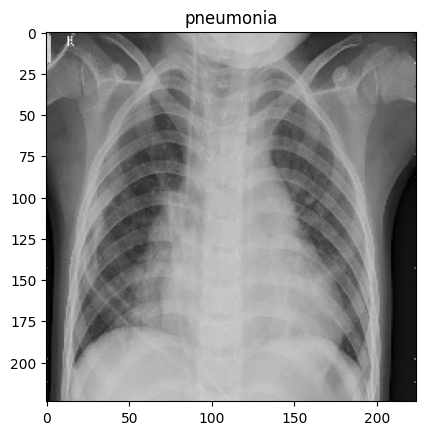

In [6]:
# Load and preprocess a single image
test_image_path = 'dataset/neumonia/BACTERIA-40699-0001.jpeg'
test_image = Image.open(test_image_path).convert('RGB').resize((150, 150))
test_image = np.expand_dims(test_image, axis=0) 

# Load the model
model = tf.keras.models.load_model('xray_model.keras')

# Make a prediction
prediction = model.predict(test_image)
label = 'pneumonia' if prediction > 0.5 else 'normal'
plt.imshow(Image.open(test_image_path))
plt.title(label)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


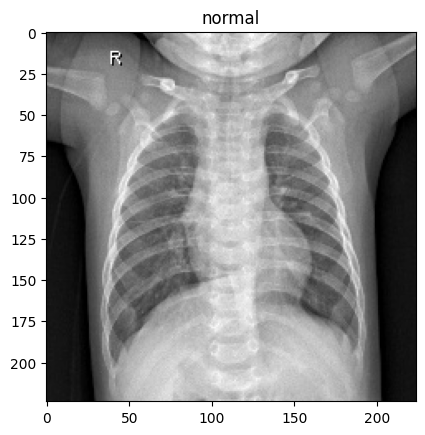

In [10]:
# Load another image
test_image_path2 = 'dataset/no-neumonia/IM-0383-0001.jpeg'
test_image2 = Image.open(test_image_path2).convert('RGB').resize((150, 150))
test_image2 = np.expand_dims(test_image2, axis=0) 

# Make a prediction
prediction2 = model.predict(test_image2)
label2 = 'pneumonia' if prediction2 > 0.5 else 'normal'
plt.imshow(Image.open(test_image_path2))
plt.title(label2)
plt.show()

<h2 style='text-align: center' id='Conclusion'><strong>12. Conclusion</strong></h2>

In this notebook, we trained a Convolutional Neural Network (CNN) to predict Pneumonia in X-Ray images. We used supervised learning to train the CNN, where the model learned the patterns in the images to predict the labels. The model achieved high accuracy on the validation set, demonstrating its ability to generalize to unseen data. We also made predictions on a single image, showing how the model can be used to diagnose Pneumonia based on X-Ray images.

With this example, we have demonstrated how supervised learning can be used to train a CNN for medical diagnostics. This approach can be extended to other medical imaging tasks, such as detecting tumors in MRI scans or identifying diseases in histopathology images. By leveraging labeled data and deep learning models, we can build powerful tools for healthcare professionals to improve patient outcomes and save lives.
